# Lecture 12: The Normal Distribution
***

We'll need Numpy, Matplotlib, and maybe Pandas for this notebook, so let's load them. 

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
#from scipy.stats import norm
import scipy.stats as stats
import math
import pandas as pd 
%matplotlib inline

### Exercise 1 - Sampling from the Normal Distribution with Python 
*** 

**Part A**: Draw at least $10000$ samples from the distribution $N(0,1)$ and store the results in a variable called $z$.  Make a density histogram of $z$. Set the $x$-limits for your plot to $[-10,10]$ and your $y$-limits to $[0,0.5]$ so we can compare with the plots we'll generate in **Parts B-D**.

(0, 0.5)

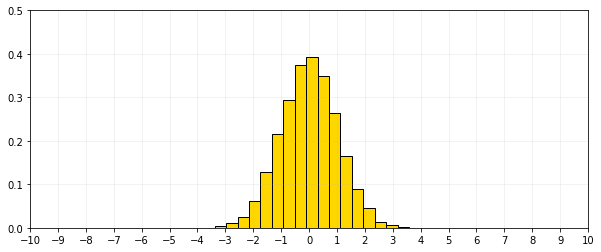

In [13]:
z = np.random.normal(size=10000)
fig, ax = plt.subplots(1,1, figsize=(10,4))
pd.Series(z).hist(ax=ax, bins=20, color="gold", edgecolor="black", density=True)
ax.grid(alpha=0.2)
ax.set_xlim(-10,10)
ax.set_xticks(range(-10,11))
ax.set_ylim([0,0.5])

**Part B**: Look back at the documentation from your function for generating samples from $N(0,1)$.  Modify your code (copy-paste) from **Part A** to draw samples from a normal distribution with parameters $\mu=3$ and $\sigma^2 = 4$, i.e. $N(3,4)$, and store the results in a variable called $x$. Make a density histogram with the same axes limits.  Does your picture seem right based on the changes to the parameters of the distribution? 

(0, 0.5)

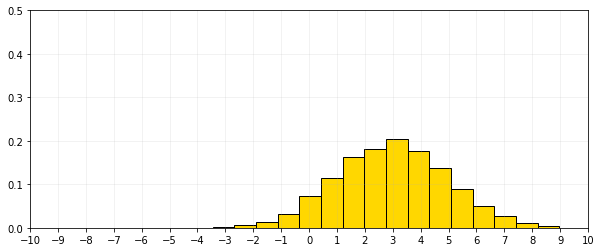

In [19]:
x = np.random.normal(loc=3, scale=2, size=10000)
fig, ax = plt.subplots(1,1, figsize=(10,4))
pd.Series(x).hist(ax=ax, bins=20, color="gold", edgecolor="black", density=True)
ax.grid(alpha=0.2)
ax.set_xlim(-10,10)
ax.set_xticks(range(-10,11))
ax.set_ylim([0,0.5])

**Part C**: Now suppose we are only able to sample from $N(0,1)$.  Could we take those samples and perform a simple transformation so that they're samples from $N(3,4)$? Try a few basic transformations on your array $z$ from **Part A** and store the results in a variable $y$.  Then make a density histogram of $y$ with the same axes limits (again, copy-paste).  Does your histogram based on the transformed data look like the histogram from **Part B**?  

(0, 0.5)

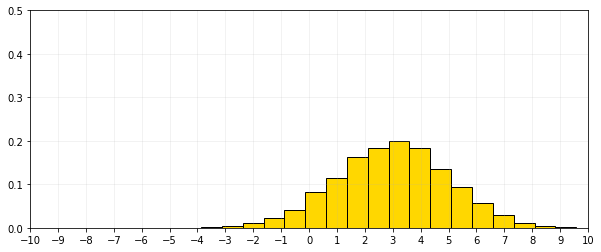

In [17]:
z = np.random.normal(size=10000)
y=z*2+3
fig, ax = plt.subplots(1,1, figsize=(10,4))
pd.Series(y).hist(ax=ax, bins=20, color="gold", edgecolor="black", density=True)
ax.grid(alpha=0.2)
ax.set_xlim(-10,10)
ax.set_xticks(range(-10,11))
ax.set_ylim([0,0.5])

**Part D**: Okey dokey, going from $N(0,1)$ to $N(3,4)$ was the easy direction, but can you go back the other way.  Can you take the $N(3,4)$ samples you have stored in $v$ from **Part B** and transform them into samples from $N(0,1)$?  Try a few transformations and store them in a variable called $v$ and make a density histogram of your transformed data . Does it look like the plot of sampled $N(0,1)$ data from **Part A**? 

(0, 0.5)

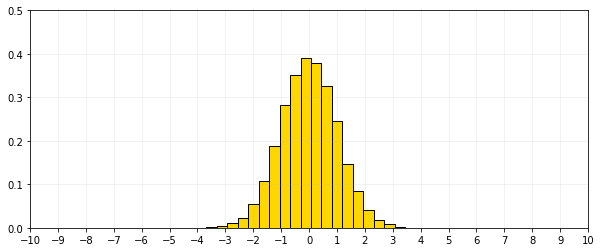

In [21]:
x = np.random.normal(loc=3, scale=2, size=10000)
v=(x-3)/2
fig, ax = plt.subplots(1,1, figsize=(10,4))
pd.Series(v).hist(ax=ax, bins=20, color="gold", edgecolor="black", density=True)
ax.grid(alpha=0.2)
ax.set_xlim(-10,10)
ax.set_xticks(range(-10,11))
ax.set_ylim([0,0.5])

**Part D**: Next let's overlay the density function for $N(3,4)$ over our histogram and check that everything looks good.  Look up the documentation for Scipy.stats's [normal random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). The object scipy.stats.norm implements all kinds of cool functions related to the normal distribution, including: pdf, cdf and ppf.  Use the scipy.stats.norm pdf function to plot a density function overlay over your histogram from **Part B**. 

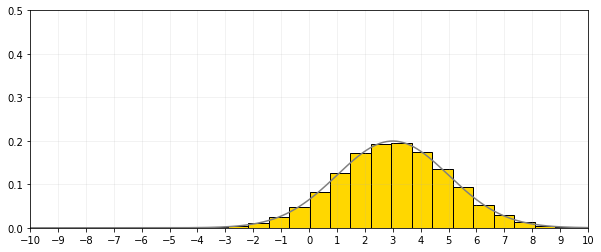

In [23]:
z = np.random.normal( size=10000)
y=z*2+3
fig, ax = plt.subplots(1,1, figsize=(10,4))
pd.Series(y).hist(ax=ax, bins=20, color="gold", edgecolor="black", density=True)
ax.grid(alpha=0.2)
ax.set_xlim(-10,10)
ax.set_xticks(range(-10,11))
ax.set_ylim([0,0.5])

from scipy.stats import norm
x = np.linspace(-10,10,500)
f = norm.pdf(x, 3 , 2)
ax.plot(x,f,color="gray")

### Exercise 2 - Probabilities and Critical Values
*** 


Let $Z$ be a standard normal random variable, i.e. $Z \sim N(0,1)$.  

**Part A**: Use scipy.stats.norm to compute $P(Z \leq 1.25)$ and $P(Z \geq 1.25)$. 

In [26]:
a = norm.cdf(1.25)
print(a)
print(1-a)

0.894350226333
0.105649773667


**Part B**: Use Python to find the critical value $z_\alpha$ corresponding to a tail with probability mass $0.05$.  That is, the value of $z_\alpha$ such that $P(Z \geq z_\alpha) = 0.05$. 

In [28]:
alpha = 0.05
norm.ppf(1-alpha)

1.6448536269514722

**Part C**: Suppose you want to find $z_\alpha$ such that $P(-z_\alpha \leq Z \leq z_\alpha) = 0.95$.  What is the value of $z_\alpha$ that accomplishes this, and in particular, what is the corresponding value of $\alpha$? 

In [29]:
alpha=0.025
norm.ppf(1-alpha)

1.959963984540054

### Exercise 3  - Standard Deviations and Grading Curves
*** 

The following picture depicts the much-often spouted facts in statistics classes that roughly $68\%$ of the probability for a normal distribution falls within 1 standard deviation of the mean, roughly $95\%$ falls within two standard deviations of the mean, etc 

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/400px-Standard_deviation_diagram.svg.png)


**Part A**: Verify the first fact, that roughly $68\%$ of the probability in the standard normal distribution falls between $\mu-\sigma = -1$ and $\mu+\sigma = 1$. 


**Part B**: Verify the second fact, that roughly $95\%$ of the probability in the standard normal distribution falls between $\mu-2\sigma = -2$ and $\mu+2\sigma = 2$. 

**Part C**: Suppose you have grades from a Calculus exam that roughly follow a normal distribution with mean $70$ and standard deviation $15$.  What percentage of the students earned C's and B's (count things like $C$-'s and $B$+'s as $C$'s and $B$'s, etc.)?

**Part D**: A common curving scheme in university courses is to set the Pass mark of a class at $\mu - 1.5\sigma$.  That is, if the overall mean of the course is low, instead of holding back people with grades of $69$ or lower, professors will lower the cutoff point to $\mu - 1.5\sigma$.  (Of course, if the mean of the course is higher than usual we don't apply this rule, because we're not monsters). If the grades at the end of a course roughly follow a normal distribution with mean $70$ and standard deviation $15$, what is the cutoff point for passing the class?  What percentage of students will pass the class?  

**Part E**: Repeat the calculations you did in **Parts C** and **E** by first transforming to a standard normal distribution. 

### Exercise 4 - Sampling from the Standard Normal with Box-Muller 
*** 

If you have to draw samples from a normal distribution in a non-prototyping language you might have to roll your own.  Most languages provide a method for sampling from the uniform distribution $U[0,1]$. In C++, for instance, you can generate draws from $U[0,1]$ as follows

In [ ]:
#include <stdlib.h>

double uniformZeroOne()
{
    return rand() / (RAND_MAX + 1.);
}

The so-called [Box-Muller Transformation](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) can be used to take random draws from $U[0,1]$ and produce random draws from $N(0,1)$. Look at the Wiki page for Box-Muller and then see if you can implement it.

**Part A**: Write a function box_muller with argument size that implements the Box-Muller transformation by sampling from values in $U[0,1]$ and returns size samples from $N(0,1)$. 


**Part B**: Use your function from **Part A** to draw at least 10000 samples from $N(0,1)$ and make a histogram. Then use norm.pdf to overlay the standard normal density curve over your histogram and check your work. 